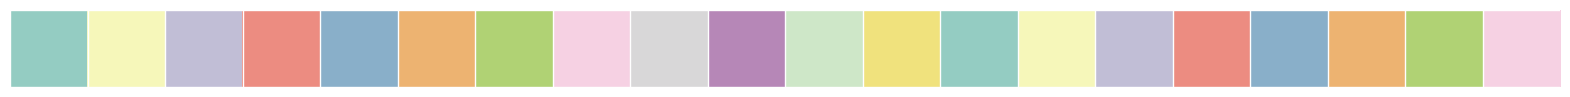

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import spacy
import nltk
import string

from bs4 import BeautifulSoup
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN

%store -r python_questions
%store -r python_questions_yr_1
%store -r python_questions_yr_2
%store -r python_questions_yr_3
%store -r python_questions_yr_4
%store -r python_questions_yr_5
%store -r python_questions_yr_6
%store -r python_questions_yr_7
%store -r python_questions_yr_8
%store -r python_questions_cleaned

%matplotlib inline
sns.palplot(sns.color_palette("Set3", n_colors=20, desat=.8))
sns.set_palette("Set3", n_colors=20, desat=.8)

In [2]:
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 
              'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 
              'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 
              'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 
              'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 
              'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 
              'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 
              'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 
              'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', 
              "can't", 'cause', 'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'contain', 'containing', 
              'contains', 'could', 'couldnt', 'd', 'date', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', 
              'done', "don't", 'down', 'downwards', 'due', 'during', 'e', 'each', 'ed', 'edu', 'effect', 'eg', 'eight', 
              'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'especially', 'et', 'et - al', 'etc', 
              'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'except', 'f', 'far', 
              'few', 'ff', 'fifth', 'first', 'five', 'fix', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 
              'forth', 'found', 'four', 'from', 'further', 'furthermore', 'g', 'gave', 'get', 'gets', 'getting', 'give', 
              'given', 'gives', 'giving', 'go', 'goes', 'gone', 'got', 'gotten', 'h', 'had', 'happens', 'hardly', 'has', 
              "hasn't", 'have', "haven't", 'having', 'he', 'hed', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 
              'heres', 'hereupon', 'hers', 'herself', 'hes', 'hi', 'hid', 'him', 'himself', 'his', 'hither', 'home', 'how', 
              'howbeit', 'however', 'hundred', 'i', 'id', 'ie', 'if', "i'll", 'im', 'immediate', 'immediately', 'importance', 
              'important', 'in', 'inc', 'indeed', 'index', 'information', 'instead', 'into', 'invention', 'inward', 'is', 
              "isn't", 'it', 'itd', "it'll", 'its', 'itself', "i've", 'j', 'just', 'k', 'keep\tkeeps', 'kept', 'kg', 'km', 
              'know', 'known', 'knows', 'l', 'largely', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 
              'lest', 'let', 'lets', 'like', 'liked', 'likely', 'line', 'little', "'ll", 'look', 'looking', 'looks', 'ltd', 
              'm', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', 'me', 'mean', 'means', 'meantime', 'meanwhile', 
              'merely', 'mg', 'might', 'million', 'miss', 'ml', 'more', 'moreover', 'most', 'mostly', 'mr', 'mrs', 'much', 'mug', 
              'must', 'my', 'myself', 'n', 'na', 'name', 'namely', 'nay', 'nd', 'near', 'nearly', 'necessarily', 'necessary', 
              'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non', 
              'none', 'nonetheless', 'noone', 'nor', 'normally', 'nos', 'not', 'noted', 'nothing', 'now', 'nowhere', 'o', 
              'obtain', 'obtained', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'omitted', 'on', 'once', 
              'one', 'ones', 'only', 'onto', 'oop', 'oops', 'or', 'ord', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 
              'out', 'outside', 'over', 'overall', 'owing', 'own', 'p', 'page', 'pages', 'part', 'particular', 'particularly', 
              'past', 'per', 'perhaps', 'placed', 'please', 'plus', 'poorly', 'possible', 'possibly', 'potentially', 'pp', 
              'predominantly', 'present', 'previously', 'primarily', 'probably', 'promptly', 'proud', 'provides', 'put', 'q', 
              'que', 'quickly', 'quite', 'qv', 'r', 'ran', 'rather', 'rd', 're', 'readily', 'really', 'recent', 'recently', 
              'ref', 'refs', 'regarding', 'regardless', 'regards', 'related', 'relatively', 'research', 'respectively', 
              'resulted', 'resulting', 'results', 'right', 'run', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'sec', 
              'section', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sent', 'seven', 
              'several', 'shall', 'she', 'shed', "she'll", 'shes', 'should', "shouldn't", 'show', 'showed', 'shown', 'showns', 
              'shows', 'significant', 'significantly', 'similar', 'similarly', 'since', 'six', 'slightly', 'so', 'some', 
              'somebody', 'somehow', 'someone', 'somethan', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 
              'soon', 'sorry', 'specifically', 'specified', 'specify', 'specifying', 'still', 'stop', 'strongly', 'sub', 
              'substantially', 'successfully', 'such', 'sufficiently', 'suggest', 'sup', 'sure\tt', 't', 'take', 'taken', 
              'taking', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", 'thats', "that've", 
              'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'thered', 
              'therefore', 'therein', "there'll", 'thereof', 'therere', 'theres', 'thereto', 'thereupon', "there've", 'these', 
              'they', 'theyd', "they'll", 'theyre', "they've", 'think', 'this', 'those', 'thou', 'though', 'thoughh', 'thousand', 
              'throug', 'through', 'throughout', 'thru', 'thus', 'til', 'tip', 'to', 'together', 'too', 'took', 'toward', 
              'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'ts', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 
              'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'ups', 'us', 'use', 'used', 'useful', 'usefully', 
              'usefulness', 'uses', 'using', 'usually', 'v', 'value', 'various', "'ve", 'very', 'via', 'viz', 'vol', 'vols', 
              'vs', 'w', 'want', 'wants', 'was', 'wasnt', 'way', 'we', 'wed', 'welcome', "well", "we'll", 'went', 'were', 'werent', 
              "we've", 'what', 'whatever', "what'll", 'whats', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 
              'whereby', 'wherein', 'wheres', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whim', 'whither', 'who', 
              'whod', 'whoever', 'whole', "who'll", 'whom', 'whomever', 'whos', 'whose', 'why', 'widely', 'will', 'willing', 
              'wish', 'with', 'within', 'without', 'wont', 'words', 'world', 'would', 'wouldnt', 'www', 'x', 'y', 'yes', 'yet', 
              'you', 'youd', "you'll", 'your', 'youre', 'yours', 'yourself', 'yourselves', "you've", 'z', 'zero']

python_stop_words = ['python', 'scripts', 'script', 'code', 'py', 'doesn', 'work', 'works', 'fine', 'don', 'help', 
                     'true', 'false', 'return', 'acces', 'access', 'achieve', 'add', "additional", 'advance', 'allow', 'answer', 
                     'appear', 'appreciate', 'assume', 'basically', 'break', 'case', 'change', 'check', 'clear', 
                     'complete', 'correct', 'correctly', 'create', 'current', 'currently', 'def', 'dict', 'easy', 
                     'edit', 'element', 'elif', 'empty', 'enter', 'exist', 'expect', 'explain', 'float', 'follow', 
                     'form', 'function', 'generate', 'good', 'happen', 'import', 'include', 'init', 'input', 
                     'inside', 'int', 'keep', 'large', 'learn', 'length', 'long', 'lot', 'main', 'note', 'number', 
                     'open', 'option', 'original', 'output',  'place', 'pretty', 'previous', 'print', 'problem', 
                     'proces', 'process', 'program', 'project', 'provide', 'raise', 'range', 'read', 'reason', 
                     'receive', 'remove', 'require', 'response', 'result', 'second', 'select', 'send', 'separate', 
                     'simple', 'solution', 'solve', 'specific', 'start', 'suggestion', 'suppose', 'sure', 'template', 
                     'test', 'three', 'type', 'unable', 'understand', 'var', 'variable', 'version', 'view', 'wonder', 
                     'wrong', 'accomplish', 'accord', 'action', 'actual', 'alternative', 'area', 'amount', 'age', 
                     'attempt', 'automatically', 'avoid', 'bad', 'base', 'big', 'build', 'bunch', 'calculate', 'call', 
                     'char', 'clas', 'close', 'collect', 'combine', 'comment', 'completely', "complex", "compute", 
                     'computer', "configure", "config", "confused", "consider", "continue", "day", "deal", "definition", 
                     "description", "desire", "detail", "dev", "difference", "dir", "directly", "double", "draw", "dynamically", 
                     "easily", "enable", "entire", "environment", "env", "equal", "essentially", "exactly", "face", "fact", "fail", 
                     "feel", "fill", "finally", "find", "finish", "foo", "force", "full", "func", "future", "general", "global", 
                     "goal", "great", "greatly", "hand", "hard", "hello", "high", "hint", "hold", "hope", "hop", "hour", "idea", 
                     "ignore", "img", "implement", "increase", "info", "init__.py", "initial", "instal", "installation", "interested", 
                     "issue", "iteration", "job", "kind", "late", "leave", "left", "letter", "lib", "limit", "list", "load", 
                     "local", "locally", "locate", "loop", "lose", "low", "manage", "manage.py", "manager", "manually", 
                     "map", "match", "matter", "max", "mention", "min", "mind", "minute", "models.py", "moment", "month", 
                     "move", "multi", "newbie", "nice", "notice", "null", "num", "obj", "occur", "online", "operation", 
                     "oth", "package", "param", "pas", "people", "perfectly", "performance", "piece", "play", 
                     "post", "practice", "prefer", "pres", "prevent", "price", "programming", "properly", "purpose", 
                     "question", "raw", "real", "realize", "recognize", "record", "red", "regard", "regular", "relate", 
                     "report", "resolve", "rest", "save", "self.name", "sense", "set", "setup.py", "share", "short", 
                     "side", "sign", "signal", "simply", "single", "size", "small", "slow", "socket.socket", "special", 
                     "src", "state", "statu", "step", "str", "strange", "stuck", "stuff", "succes", "switch", "tab", 
                     "temp", "term", "Testing", "thing", "third", "throw", "title", "tool", "top", "total", "trouble", "turn", 
                     "user", "usr", "views.py", "wait", "warning", "week", "weird", "win", "windows", "word", "wrap", "write", 
                     "year", "yield"]

additional_stop_words = ['.__init', '.append', '.csv', '.encode', '.format', '.grid', '.html', '.join', '.jpg', '.png', 
                         '.read', '.split', 'abc', 'accept', 'advice', 'append', 'application', 'apply', 'arg', 'args', 
                         'argument', 'attribute', 'character', 'class', 'command', 'convert', 'count', 'datum', 'decide', 
                         'define', 'error', 'example', 'explanation', 'file', 'filter', 'fortunately', 'happy', 'http', 'indicate', 
                         'install', 'instance', 'integer', 'item', 'key', 'label', 'lambda', 'len', 'library', 'luckily', 'lucky', 
                         'message', 'method', 'multiple', 'object', 'order', 'pass', 'point', 'pull', 'quick', 'sad', 'sadly', 'search', 
                         'string', 'sum', 'task', 'text', 'thread', 'time', 'understanding', 'update', 'valid', 'window', 'google', 
                         'helpful', 'definitely']

stop_words.extend(python_stop_words)
stop_words.extend(additional_stop_words)

TOTAL_STOP_WORDS = frozenset(stop_words)

In [3]:
nlp = spacy.load("en")

In [4]:
def extra_cleaning(text):
    new_text = re.sub("(&lt;)+|(&gt;)+|(i\.e\.)+|(e\.g\.)+", "", text)
    return new_text

def find_top_n_import(df, n, ax = None, color = "#074484"):
    pattern = re.compile(r'(from\s([^\s]+)\simport\s([^\s]+)|import\s([^\s]+))')
    sample_text_import = df["Code Body"].str.extractall(pattern)[0]
    sample_text_import_count = sample_text_import.value_counts()
    sample_text_import_count_df = pd.DataFrame(sample_text_import_count, index=sample_text_import_count.index, columns=["Count"])
    if(ax == None): sns.barplot(y=sample_text_import_count_df.iloc[0:n].index,
            x=sample_text_import_count_df.iloc[0:n].Count, 
            data=sample_text_import_count_df.iloc[0:n],
            color=color)
    else: sns.barplot(y=sample_text_import_count_df.iloc[0:n].index,
            x=sample_text_import_count_df.iloc[0:n].Count, 
            data=sample_text_import_count_df.iloc[0:n],
            color=color, ax = ax)
        
def get_clusters(X, index, n_cluster, batch_size=200, series_name='clusters'):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = MiniBatchKMeans(n_clusters=n_cluster, init='k-means++', n_init=10, init_size=1000, 
                                batch_size=batch_size).fit(X)
        return pd.Series(model.labels_, index=index, name=series_name)
    
def get_top_n_qns_from_cluster_m(df, cluster, num = 10):
    temp_df = df[df["Cluster"] == cluster]
    temp_df = temp_df.sort_values("Tf-idf Score", ascending=False)
    return temp_df[["Cluster", "Full Body (Title + Body + Code)", "Tf-idf Score"]].head(num)

def get_tsne(dtm, dtm_df):
    tsne = TSNE(n_components=2, random_state=0)
    if dtm_df.shape[1] <= 10000:
        dtm_tsne = tsne.fit_transform(dtm.toarray())
    else:
        n_components_pca = 10000
        dtm_tsne = tsne.fit_transform(PCA(n_components=n_components_pca, random_state=0).fit_transform(dtm.toarray()))
    return dtm_tsne

def is_valid_word(string):
    if(len(string) < 2): return False
    else:
        first_char = string[0]
        time = 1
        for char in string[1:]:
            if(char == first_char): time+= 1
            else: time = 0
            if(time >= 3): return False
    return True

def plot_score_title_body_length(df):
    questions_title_length = df["Title"].apply(lambda x: len(x))
    questions_body_length = df["Body"].apply(lambda x: len(x))
    fig, ax = plt.subplots(ncols=3, nrows=1)
    fig.set_size_inches(11.7, 4)
    sns.distplot(df[(df.Score <= 50) & (df.Score >= -20)].Score, ax=ax[0], color="#074484", kde=False)
    sns.distplot(questions_title_length, ax=ax[1], color="#074484", kde=False)
    sns.distplot(questions_body_length[questions_body_length < 10000], ax=ax[2], color="#074484", kde=False)
    
def print_original_and_tokenized(text_series, index=-1):
    if(index == -1): index = np.random.randint(0, text_series.shape[0])
    print("Current index: %.d" % index + "\n")
    print("Original: " + text_series.iloc[index] + "\n")
    print("Tokenized: " + str(list(tokenize(text_series.iloc[index]))) + "\n")
    print("Finalized: " + str(list(remove_stop_words(text_series.iloc[index]))))
    
def remove_stop_words(text):
    text_token = list(filter(lambda x: x not in TOTAL_STOP_WORDS, tokenize(text)))
    return text_token
    
def return_code_body(text):
    pattern = re.compile(r'<[^>]+>|\n|\r')
    soup = BeautifulSoup(text, 'html.parser')
    return pattern.sub(" ", str(soup.pre))

def return_top_n_words(dtm_df, cluster, cluster_df, n):
    new_df = dtm_df.join(pd.DataFrame(dtm_df.sum(axis=1), columns=["Tf-idf Score"], index=dtm_df.index))
    new_df["cluster"] = cluster_df
    lst = list(new_df[new_df["cluster"] == cluster].sum().sort_values(ascending=False).index[2:])
    if(len(lst) > n): print(" ".join(lst[:n]))
    else: print(" ".join(lst))

def sampling_clean_text(df, num_of_samples = None):   
    if(num_of_samples != None): test_code = df.sample(n=num_of_samples)
    else: test_code = df.copy()
    test_code["Code Body"] = test_code["Body"].apply(lambda x: return_code_body(x)).apply(lambda y: extra_cleaning(y))
    test_code["Body Exc. Code"] = test_code["Body"].str.replace(r'<pre>([a]|[^a])+</pre>'," ").str.replace(r"<[^>]+>|\n|\r", " ")
    test_code["Body Exc. Code"] = test_code["Body Exc. Code"].apply(lambda x: extra_cleaning(x))
    test_code["Title + Body Exc. Code"] = test_code["Title"].str.cat(test_code["Body Exc. Code"], sep = " ")
    test_code["Full Body (Title + Body + Code)"] = test_code["Title + Body Exc. Code"].str.cat(test_code["Code Body"], sep = " ")
    return test_code.reindex_axis(sorted(test_code.columns), axis=1)

def tokenize(text):
    text = text.lower()
    text_new = ""
    stop_word = ["-PRON-", "_", ".", "'", "'s", ".py", ".txt"]
    word_list = ["os", "app", "api", "amp", "csv", "gui", "mac", "sql", "web", "xml", "url"]
    for ch in text:
        if ((ch not in '!"#$%&\()*+,-/:;<=>?@[\\]^`{|}~') & (ch not in "âÂ0123456789") & (ch != "")): 
            text_new += ch
        else: text_new += " "
    doc = nlp(text_new)
    tokens = []
    for token in doc:
        if (" " not in token.lemma_) & ("    " not in token.lemma_): 
            if(is_valid_word(token.lemma_) == False): continue
            if((token.lemma_ not in stop_word) & (len(token.lemma_) > 3) & (".." not in token.lemma_)): tokens.append(token.lemma_)
            if((len(token.lemma_) <= 3) & (token.lemma_ in word_list)): tokens.append(token.lemma_)
    tokens = list(filter(lambda x: (bool(re.match(r'(\.\w+)', x)) == False) & 
                         (bool(re.match(r'(www\.\S+)', x)) == False), tokens))
    return tokens

# Exploring Data

In [5]:
# python_questions = pd.read_csv("./pythonquestions/Questions.csv", encoding = "latin1")

In [6]:
# python_questions["CreationDate"] = python_questions["CreationDate"].apply(lambda x: pd.to_datetime(x))
# python_questions["Title"] = python_questions["Title"].apply(lambda x: str(x))
# python_questions["Body"] = python_questions["Body"].apply(lambda x: str(x))

In [7]:
# python_questions.set_index("Id", inplace=True)

In [8]:
python_questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602869 entries, 203487 to 40043149
Data columns (total 5 columns):
OwnerUserId     596699 non-null float64
CreationDate    602869 non-null datetime64[ns]
Score           602869 non-null int64
Title           602869 non-null object
Body            602869 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 27.6+ MB


In [9]:
# python_questions = python_questions[(python_questions["CreationDate"] > "2008-10-14 23:59:59") & (python_questions["CreationDate"] < "2016-10-13 00:00:00")]
python_questions.head(5)

,OwnerUserId,CreationDate,Score,Title,Body
Id,,,,,
203487,5646.0,2008-10-15 02:00:27,19,Creating self-contained python applications,<p>I'm trying to create a self-contained versi...
203758,115.0,2008-10-15 04:55:33,2,Receive socket size limits good?,<p>I am writing a program in Python that will ...
203859,432.0,2008-10-15 06:22:22,2,"How do I get python-markdown to additionally ""...",<p>Markdown is a great tool for formatting pla...
203912,20211.0,2008-10-15 06:59:50,60,Does python support multiprocessor/multicore p...,<p>What is the difference between multiprocess...
204017,267.0,2008-10-15 08:24:28,206,How do I execute a program from python? os.sys...,<p>I have a python script that needs to execut...


In [10]:
python_questions_with_code = python_questions[python_questions["Body"].apply(lambda text: '<pre>' in text)]
python_questions_with_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483535 entries, 204017 to 40043149
Data columns (total 5 columns):
OwnerUserId     478824 non-null float64
CreationDate    483535 non-null datetime64[ns]
Score           483535 non-null int64
Title           483535 non-null object
Body            483535 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 22.1+ MB


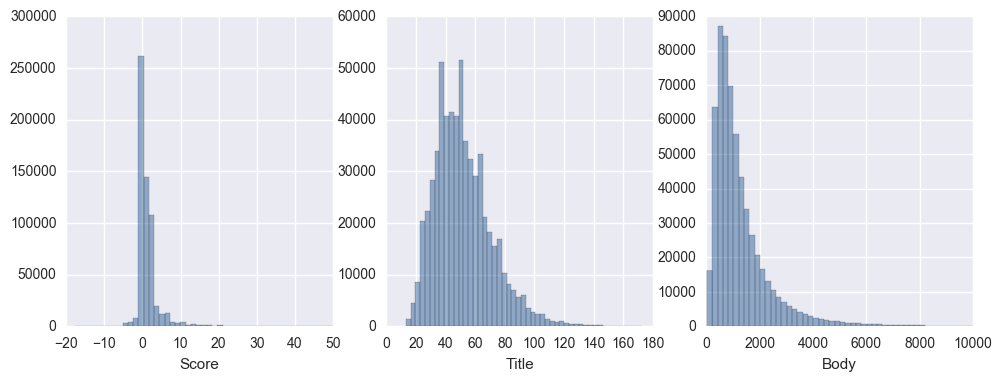

In [11]:
plot_score_title_body_length(python_questions)

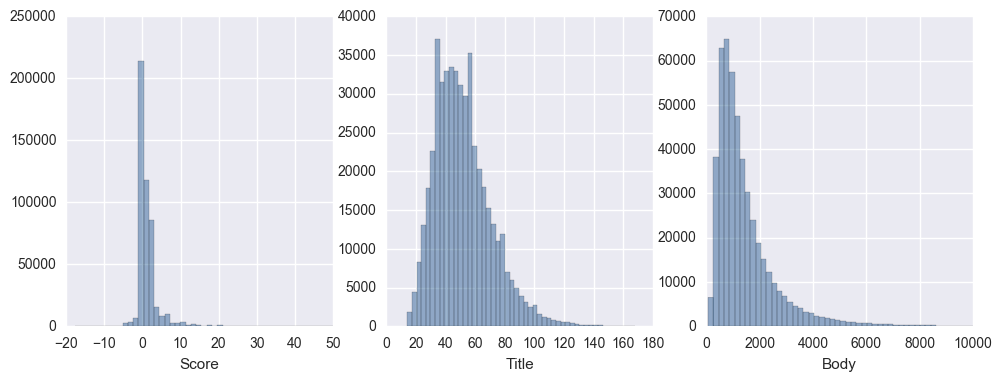

In [12]:
plot_score_title_body_length(python_questions_with_code)

# Constructing Vectorizer 

In [13]:
sample_text = sampling_clean_text(python_questions, 5000)

In [14]:
sample_text["Word Count"] = sample_text["Title + Body Exc. Code"].apply(lambda x: len(tokenize(x)))
sample_text = sample_text[sample_text["Word Count"] > 50]

In [15]:
print_original_and_tokenized(sample_text["Title + Body Exc. Code"])

Current index: 959

Original: Get focus on tkinter program after pc is unlocked  I have a tkinter program written in python 3.3.3. I see myself in the need of making the the program get focus when the user unlocks the computer. I don't really know how to go ahead and start with this, users have a .exe version of the program that I created with cxfreeze. I f i need to modify the .py and create another .exe, that wouldn't be a problem.     After some research I found that one can use the ctypes module to lock the computer, but it's not very helpful because i need to know if it is locked or unlocked. I also saw commands from win32com, but i can't seem to be able to find a way to trigger a command when it gets unlocked.    What is the best way to get focus on my program after the computer is unlocked??    Any help is greatly appreciated.  

Tokenized: ['focu', 'tkinter', 'program', 'after', 'unlock', 'have', 'tkinter', 'program', 'write', 'python', 'need', 'make', 'program', 'focu', 'when'

In [16]:
vect_idf = TfidfVectorizer(min_df=50, max_df=0.8, stop_words=TOTAL_STOP_WORDS, ngram_range=(1,1), tokenizer=tokenize,
                           analyzer='word', use_idf=True)

In [17]:
dtm_idf = vect_idf.fit_transform(sample_text["Title + Body Exc. Code"])

In [18]:
dtm_idf_df = pd.DataFrame(dtm_idf.toarray(), columns=vect_idf.get_feature_names(), index=sample_text.index)
dtm_idf_df.head(5)

,api,app,approach,array,basic,button,click,client,column,connect,...,sort,source,statement,store,structure,system,table,url,web,website
Id,,,,,,,,,,,,,,,,,,,,,
34053273,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16059106,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6697322,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.507461,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37193941,0.0,0.0,0.0,0.000000,0.0,0.0,0.343968,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34276779,0.0,0.0,0.0,0.680829,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
print(", ".join(list(filter(lambda x: ("." not in x) | ("." in x), list(vect_idf.get_feature_names())))))

api, app, approach, array, basic, button, click, client, column, connect, content, copy, course, csv, database, default, dictionary, directory, display, django, documentation, download, exception, execute, extract, fast, field, figure, folder, format, handle, html, image, language, level, link, machine, model, module, numpy, panda, parameter, parse, path, perform, plot, query, reference, request, server, site, sort, source, statement, store, structure, system, table, url, web, website


# Latent Dirichlet Allocation

In [20]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.word2vec import LineSentence

In [21]:
text_before_list = sample_text["Title + Body Exc. Code"].apply(lambda x: remove_stop_words(x))
text_cleaned = list(text_before_list)
dictionary = Dictionary(text_cleaned)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_cleaned]

In [22]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda = LdaMulticore(doc_term_matrix, num_topics=10, id2word=dictionary, workers=3, passes=50)

In [23]:
lda.show_topics(3)

[(6,
  '0.015*"server" + 0.014*"client" + 0.014*"module" + 0.011*"sort" + 0.009*"database" + 0.009*"event" + 0.007*"combination" + 0.006*"port" + 0.005*"host" + 0.005*"group"'),
 (3,
  '0.030*"module" + 0.013*"parameter" + 0.010*"path" + 0.008*"directory" + 0.008*"image" + 0.007*"mysql" + 0.007*"api" + 0.006*"position" + 0.006*"system" + 0.006*"query"'),
 (5,
  '0.017*"csv" + 0.011*"directory" + 0.011*"folder" + 0.010*"xml" + 0.008*"panda" + 0.008*"html" + 0.008*"menu" + 0.008*"table" + 0.008*"column" + 0.007*"ipython"')]

In [24]:
import pyLDAvis
import pyLDAvis.gensim

In [25]:
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, doc_term_matrix, dictionary)

In [26]:
pyLDAvis.display(LDAvis_prepared)

In [27]:
new_doc_df = pd.DataFrame(text_before_list)
new_doc_df.columns = ["Word List"]
new_doc_df["Matrix"] = new_doc_df["Word List"].apply(lambda x: dictionary.doc2bow(x))

In [28]:
for index, value in new_doc_df.iterrows():
    doc_matrix = value[1]
    for pair in lda[doc_matrix]:
        group = pair[0]
        probability = pair[1]
        new_doc_df.loc[index, group] = probability

# Using K-Means and Visualizing Clusters

In [29]:
clusters_idf = get_clusters(dtm_idf, sample_text.index, 7)
clusters_idf_df = pd.DataFrame(clusters_idf)
clusters_idf_df.columns = ["Cluster"]
sample_text_new_cluster = sample_text.join(pd.DataFrame(clusters_idf_df), how="left")

In [30]:
pd.DataFrame(sample_text_new_cluster["Cluster"].value_counts())

,Cluster
2,1142
6,120
3,112
5,87
4,69
1,52
0,45


In [31]:
for index in pd.DataFrame(sample_text_new_cluster["Cluster"].value_counts()).index:
    print("Cluster %d:" % index)
    return_top_n_words(dtm_idf_df, index, clusters_idf, 30)

Cluster 2:
server image figure request dictionary app api plot store url sort link path display parameter directory documentation client execute system web button format approach exception handle database download parse source
Cluster 6:
django model database app url field request web display site server store api image content default handle system documentation button source link html folder website query client execute basic exception
Cluster 3:
module execute directory display folder figure machine numpy statement source course path level content handle web system format site copy parameter store api link default reference structure django database server
Cluster 5:
column panda csv format numpy array extract plot store figure sort approach perform table statement parameter documentation fast reference default field database basic site copy button model image module course
Cluster 4:
array numpy sort figure image column store approach plot format folder fast structure copy field cs

In [32]:
count_idf_tsne = get_tsne(dtm_idf, dtm_idf_df)

In [33]:
count_idf_tsne_df = pd.DataFrame(count_idf_tsne, index=sample_text.index, columns=['x', 'y'])
count_idf_tsne_df["Cluster"] = clusters_idf

In [34]:
count_idf_tsne_df.head(5)

,x,y,Cluster
Id,,,
34053273,6.223212,-3.552552,2
16059106,14.478498,6.563144,2
6697322,-5.972323,-3.410964,2
37193941,4.098456,-18.325094,2
34276779,-15.416807,-6.195856,4


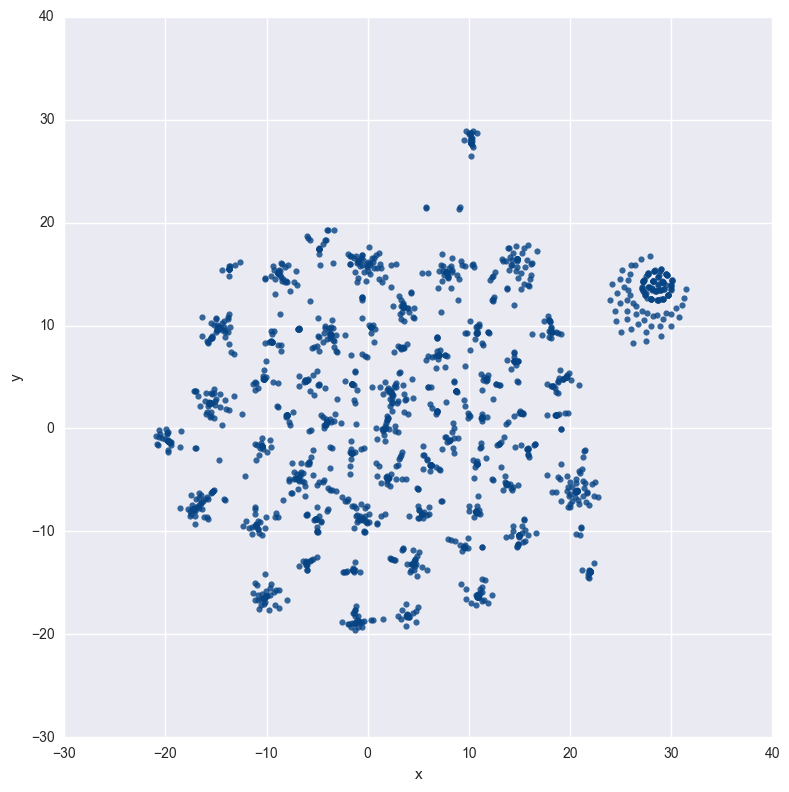

In [35]:
sns.lmplot("x", "y", data=count_idf_tsne_df, fit_reg=False, aspect=1.0, size=8, scatter_kws={"color": "#074484"})

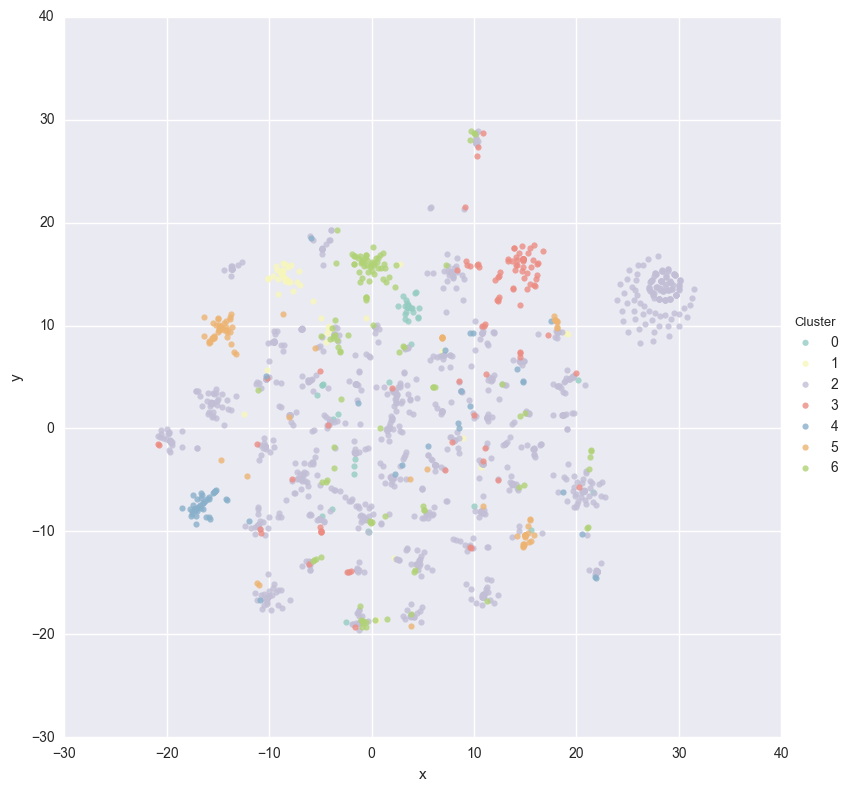

In [36]:
sns.lmplot("x", "y", data=count_idf_tsne_df, hue="Cluster", fit_reg=False, aspect=1.0, size=8)

# Trend Analysis

In [37]:
# python_questions_yr_1 = sampling_clean_text(python_questions.loc[(python_questions["CreationDate"] > "2008-10-14 23:59:59") & (python_questions["CreationDate"] < "2009-10-14 00:00:00")])
# python_questions_yr_2 = sampling_clean_text(python_questions.loc[(python_questions["CreationDate"] > "2009-10-13 23:59:59") & (python_questions["CreationDate"] < "2010-10-15 00:00:00")])
# python_questions_yr_3 = sampling_clean_text(python_questions.loc[(python_questions["CreationDate"] > "2010-10-14 23:59:59") & (python_questions["CreationDate"] < "2011-10-15 00:00:00")])
# python_questions_yr_4 = sampling_clean_text(python_questions.loc[(python_questions["CreationDate"] > "2011-10-14 23:59:59") & (python_questions["CreationDate"] < "2012-10-14 00:00:00")])
# python_questions_yr_5 = sampling_clean_text(python_questions.loc[(python_questions["CreationDate"] > "2012-10-13 23:59:59") & (python_questions["CreationDate"] < "2013-10-14 00:00:00")])
# python_questions_yr_6 = sampling_clean_text(python_questions.loc[(python_questions["CreationDate"] > "2013-10-13 23:59:59") & (python_questions["CreationDate"] < "2014-10-14 00:00:00")])
# python_questions_yr_7 = sampling_clean_text(python_questions.loc[(python_questions["CreationDate"] > "2014-10-13 23:59:59") & (python_questions["CreationDate"] < "2015-10-14 00:00:00")])
# python_questions_yr_8 = sampling_clean_text(python_questions.loc[(python_questions["CreationDate"] > "2015-10-13 23:59:59") & (python_questions["CreationDate"] < "2016-10-13 00:00:00")])

In [38]:
# python_questions_cleaned = sampling_clean_text(python_questions)

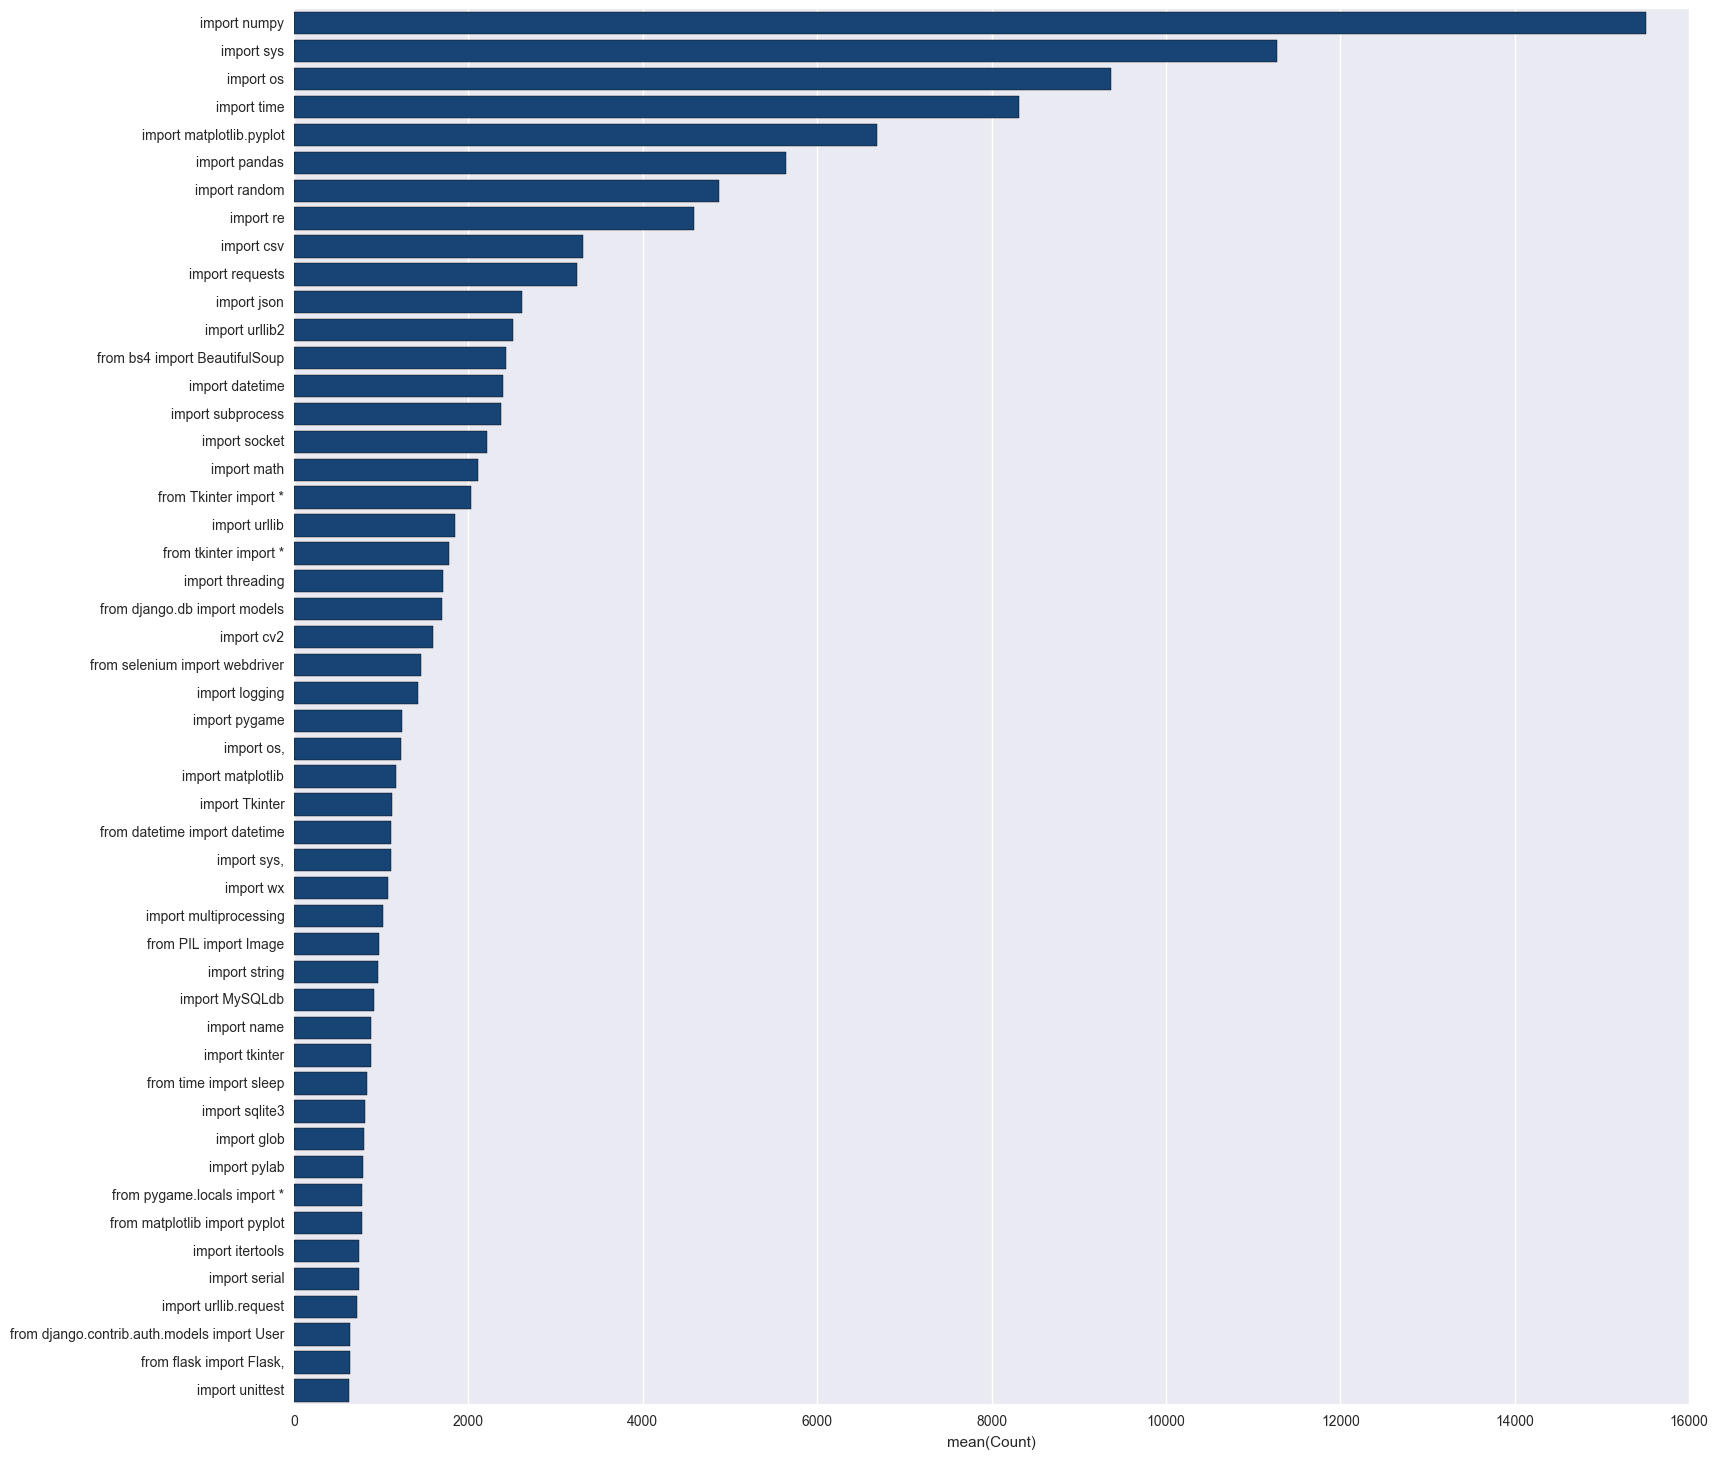

In [39]:
fig = plt.figure(figsize=(18, 18))
find_top_n_import(python_questions_cleaned, 50)

# Vectorizing the Entire Dataset

In [60]:
full_idf = TfidfVectorizer(min_df=0.005, max_df=0.8, stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,2), tokenizer=tokenize)

In [61]:
python_questions_cleaned.head(3)

,OwnerUserId,CreationDate,Score,Title,Code Body,Body + Title,Full Body
Id,,,,,,,
203487,5646.0,2008-10-15 02:00:27,19,Creating self-contained python applications,None,Creating self-contained python applications I...,Creating self-contained python applications I...
203758,115.0,2008-10-15 04:55:33,2,Receive socket size limits good?,None,Receive socket size limits good? I am writing...,Receive socket size limits good? I am writing...
203859,432.0,2008-10-15 06:22:22,2,"How do I get python-markdown to additionally ""...",None,"How do I get python-markdown to additionally ""...","How do I get python-markdown to additionally ""..."


In [62]:
full_dtm = full_idf.fit_transform(python_questions_cleaned["Full Body"])

In [64]:
full_dtm_df = pd.DataFrame(full_dtm.toarray(), index=python_questions_cleaned.index, columns=full_idf.get_feature_names())

In [68]:
full_dtm_df.head(5)

,-PRON-,-PRON- -PRON-,-PRON- build,-PRON- create,-PRON- currently,-PRON- error,-PRON- follow,-PRON- just,-PRON- like,-PRON- look,...,wrong,wxpython,xml,xml file,xy,year,yes,yield,zero,zip
Id,,,,,,,,,,,,,,,,,,,,,
203487,0.160571,0.0,0.0,0.221354,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.259396
203758,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1817,0.0,0.0,0.000000
203859,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000
203912,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000
204017,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000


In [71]:
clusters_full = get_clusters(full_dtm_df, python_questions_cleaned.index, 7)
full_dtm_df["Cluster"] = clusters_full

In [73]:
full_dtm_df["Cluster"].value_counts()

3    287219
4     92972
2     72754
6     65613
5     36424
1     34091
0     13796
Name: Cluster, dtype: int64

In [76]:
full_dtm_df = full_dtm_df.join(pd.DataFrame(full_dtm_df.sum(axis=1), columns=["Tf-idf Score"]))

In [81]:
python_questions_cleaned["Cluster"] = full_dtm_df["Cluster"]

In [82]:
python_questions_cleaned["Tf-idf Score"] = full_dtm_df["Tf-idf Score"]

In [84]:
def get_top_n_qns_from_cluster_m_new(df, cluster, num = 10):
    temp_df = df[df["Cluster"] == cluster]
    temp_df = temp_df.sort_values("Tf-idf Score", ascending=False)
    return temp_df[["Cluster", "Title", "Full Body", "Code Body", "Tf-idf Score"]].head(num)

In [86]:
get_top_n_qns_from_cluster_m_new(python_questions_cleaned, 0, 5)

,Cluster,Title,Full Body,Code Body,Tf-idf Score
Id,,,,,
38063133,0,Django OpenStack Horizon - Admin templates are...,Django OpenStack Horizon - Admin templates are...,# Standard Library import logging import os ...,9.340597
8900498,0,Exporting HTML canvas as an image sequence,Exporting HTML canvas as an image sequence I'...,"import base64, cgi, cgitb, datetime, glob, r...",8.779330
39038594,0,Deep learning: how can I save the computed mod...,Deep learning: how can I save the computed mod...,import cPickle import gzip import os import ...,8.121880
37173162,0,Python - print image bit data to a ESC/POS pri...,Python - print image bit data to a ESC/POS pri...,Hex 1D 2A x y d1...dk,8.091391
33523589,0,PYTHON: overlaying netCDF data on a basemap (c...,PYTHON: overlaying netCDF data on a basemap (c...,import numpy as np from netCDF4 import Datas...,7.983840


In [87]:
get_top_n_qns_from_cluster_m_new(python_questions_cleaned, 1, 5)

,Cluster,Title,Full Body,Code Body,Tf-idf Score
Id,,,,,
4341756,1,"Data recognition, parsing, filtering, and tran...","Data recognition, parsing, filtering, and tran...",None,9.550117
36818646,1,"Creating Dataset with Python, scraping web","Creating Dataset with Python, scraping web I'...",from bs4 import BeautifulSoup import request...,9.500407
33848397,1,Nolearn : ValueError: boolean index array shou...,Nolearn : ValueError: boolean index array shou...,import os import numpy as np from pandas.io....,9.410298
33034214,1,Where is my program output?,Where is my program output? I've created a pr...,__author__ = 'kennytruong' #CREATED BY KENNY...,9.185508
29124738,1,Creation of large pandas DataFrames from Series,Creation of large pandas DataFrames from Serie...,import time import sys import numpy as np im...,9.121187


In [88]:
get_top_n_qns_from_cluster_m_new(python_questions_cleaned, 2, 5)

,Cluster,Title,Full Body,Code Body,Tf-idf Score
Id,,,,,
33316767,2,"Apache ONLY .py files give access forbidden, cgi","Apache ONLY .py files give access forbidden, c...",## This is the main Apache HTTP server confi...,12.229681
23179811,2,Issues with ScriptAlias and AddType,"Issues with ScriptAlias and AddType OK, so, ...",# # This is the main Apache HTTP server conf...,12.226070
27039250,2,How to let CGI scripts work on MacOS 10.10 Yos...,How to let CGI scripts work on MacOS 10.10 Yos...,# This is the main Apache HTTP server config...,12.069697
18588157,2,Apache+mod_wsgi stopped working remotely,Apache+mod_wsgi stopped working remotely I ha...,# # This is the main Apache HTTP server conf...,11.998207
15401390,2,Is there any support for a Python program to b...,Is there any support for a Python program to b...,None,11.841840


In [89]:
get_top_n_qns_from_cluster_m_new(python_questions_cleaned, 3, 5)

,Cluster,Title,Full Body,Code Body,Tf-idf Score
Id,,,,,
7902647,3,Python Workflow Design Pattern,Python Workflow Design Pattern Im working on ...,"@composite_task(inputs(x=Int), outputs(z=Flo...",12.838509
37386595,3,What is the optimal topic-modelling workflow w...,What is the optimal topic-modelling workflow w...,None,12.762363
26328999,3,Beaker-Style Session in Python,Beaker-Style Session in Python Preface: I rec...,CDROM atexit impo...,12.588482
2079033,3,wx.Font uses a facename & PIL.ImageFont uses a...,wx.Font uses a facename & PIL.ImageFont uses a...,None,12.560855
8842817,3,Selecting the most fluent text from a set of p...,Selecting the most fluent text from a set of p...,None,12.361253


In [90]:
get_top_n_qns_from_cluster_m_new(python_questions_cleaned, 4, 5)

,Cluster,Title,Full Body,Code Body,Tf-idf Score
Id,,,,,
17848477,4,Cannot execute Python script in Apache althoug...,Cannot execute Python script in Apache althoug...,# # This is the main Apache HTTP server conf...,14.521759
34865683,4,Merging two YouTube API scripts,Merging two YouTube API scripts EDIT: I insta...,#!/usr/bin/python # -*- coding: utf-8 -*- # ...,14.043434
9305287,4,A Python Web Framework that makes it easy to c...,A Python Web Framework that makes it easy to c...,None,13.455772
3879788,4,How to debug Python inside a WSC,How to debug Python inside a WSC We're progra...,"&lt;?xml version=""1.0"" encoding=""Windows-125...",13.295864
25054830,4,Internal server error when deploying a Mezzani...,Internal server error when deploying a Mezzani...,"from __future__ import absolute_import, unic...",13.071940


In [91]:
get_top_n_qns_from_cluster_m_new(python_questions_cleaned, 5, 5)

,Cluster,Title,Full Body,Code Body,Tf-idf Score
Id,,,,,
12657994,5,Python cartesian product of n lists with n unk...,Python cartesian product of n lists with n unk...,http://community.topcoder.com/stat?c=problem...,13.363033
28206600,5,"Python, AttributeError: 'float' object has no ...","Python, AttributeError: 'float' object has no ...",# IMPORTS from decimal import * #Make Pytho...,13.118492
35380706,5,Python Iterating Over a List Queue - Removing ...,Python Iterating Over a List Queue - Removing ...,def QDUmp(): #Runs as a thread while 1: ...,13.084271
32541825,5,Email parser work on individual data; breaks w...,Email parser work on individual data; breaks w...,def parseEmail(document): # strip unnece...,12.896016
13655169,5,Is there a way to make collections.Counter (Py...,Is there a way to make collections.Counter (Py...,"#Natural Language Toolkit, for access to cor...",12.888931


In [92]:
get_top_n_qns_from_cluster_m_new(python_questions_cleaned, 6, 5)

,Cluster,Title,Full Body,Code Body,Tf-idf Score
Id,,,,,
33057904,6,Pipsta Printer and Printing a list,Pipsta Printer and Printing a list I'm trying...,# BasicPrint.py # Copyright (c) 2014 Able Sy...,15.296696
25673848,6,Updating the value displayed in a GUI with Pyt...,Updating the value displayed in a GUI with Pyt...,import LabJackPython import u3 import sys im...,15.292204
35150267,6,Image Module error,Image Module error It has been a while I had ...,#!/usr/bin/python # Automated Keylogg...,15.266982
7028136,6,"Python: If-elses inside a class ""init""; does t...","Python: If-elses inside a class ""init""; does t...","def room_one(): if ""flashlight"" in pack:...",15.122262
4073092,6,Errno 9 using the multiprocessing module with ...,Errno 9 using the multiprocessing module with ...,"#!/usr/bin/env python """"""Creates a small To...",15.061476
